<a href="https://colab.research.google.com/github/serhataksoy/CompLightLab/blob/main/Convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision.io 
import torch.nn as nn
import torch.fft
import matplotlib.pyplot as plt
from torchvision import transforms
from torch.nn import functional as F
from PIL import Image

In [ ]:
image = torchvision.io.read_image('/content/istockphoto-903934818-612x612.jpg')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def show(img):
    npimg = img.numpy()
    plt.imshow(np.real(np.transpose(npimg, (1,2,0))), interpolation='gaussian')

def show_Gray(img):
  npimg = img.numpy()
  plt.imshow(  img.permute(1, 2, 0) )

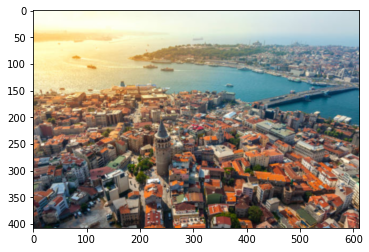

In [ ]:
show(image)

In [ ]:
image.size()

torch.Size([3, 408, 612])

In [ ]:
torchvision.transforms.functional.get_image_size(image)

[612, 408]

In [ ]:
def conv(img,kernel):
  channel = torchvision.transforms.functional.get_image_num_channels(img)
  width,height = torchvision.transforms.functional.get_image_size(img)
  KernelWidth,KernelHeight = torchvision.transforms.functional.get_image_size(kernel)
  FınalImg = torch.zeros((channel,height-KernelHeight+1,width-KernelWidth+1))

  for dim in range(channel):  
    for i in range(height-KernelHeight+1):
      for j in range(width-KernelWidth+1):
        sum = 0 
        for k in range(KernelHeight):
          for l in range(KernelWidth):
            sum += (img[dim][i+k][j+l])*(kernel[k,l])
        FınalImg[dim][i][j] = sum
  return FınalImg

In [ ]:
kernel = torch.tensor(([0,-1,0],[-1,5,-1],[0,-1,0]))
kernel2 = torch.tensor(([-1,-2,-1],[0,0,0],[1,2,1]))
kernel3 = torch.tensor(([-1,-1,-1],[-1,8,-1],[-1,-1,-1]))
kernel4 = torch.tensor(([-1,-1,1],[-2,5,3]))

In [ ]:
kernel.size()

torch.Size([3, 3])

In [ ]:
#image0 = conv(image,kernel)
#image2 = conv(image,kernel2)image3 = conv(image,kernel3)
image4 = conv(image,kernel4)

In [ ]:
 image0 = conv(image,kernel)

In [ ]:
image0 += abs(image0.min())

In [ ]:
image0 = image0/image0.max()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


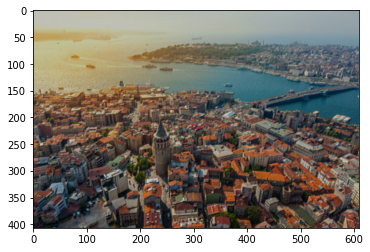

In [ ]:
show(image4/image4.max())

In [ ]:
import numpy as np
import math

## Gaussian Filters

def distance(point1,point2):
    return math.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def idealFilterLP(D0,imgShape):
    rows, cols = image.shape[1:3]
    center = (rows/2,cols/2)
    base = torch.zeros(1,rows,cols)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[0][y][x] = 1
    return base

def idealFilterHP(D0,imgShape):
    dim = image.shape[0]
    rows, cols = image.shape[1:3]
    base = torch.zeros(1,rows,cols)
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[dim][y][x] = 0
    return base

def butterworthLP(D0,imgShape,n):
    for x in range(cols):
        for y in range(rows):
            base[0][y][x] = 1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

def butterworthHP(D0,imgShape,n):
    dim = image.shape[0]
    rows, cols = image.shape[1:3]
    base = torch.zeros(1,rows,cols)
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[0][y][x] = 1-1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

def gaussianLP(D0,imgShape):
    dim = image.shape[0]
    rows, cols = image.shape[1:3]
    base = torch.zeros(1,rows,cols)
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[0][y][x] = math.exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

def gaussianHP(D0,imgShape):
    dim = image.shape[0]
    rows, cols = image.shape[1:3]
    base = torch.zeros(1,rows,cols)
    center = (rows/2,cols/2)

    for x in range(cols):
        for y in range(rows):
            base[0][y][x] = 1 - math.exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


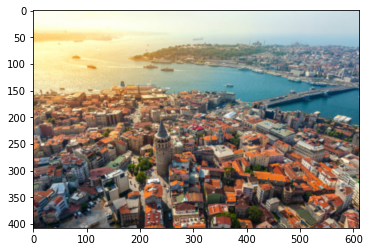

In [ ]:
fft_img = torch.fft.fft2(image)
fft_img = torch.fft.fftshift(fft_img)
fft_img = torch.fft.ifftshift(fft_img)
fft_img = torch.fft.ifft2(fft_img)
fft_img = fft_img/255
show(fft_img)


In [ ]:
def ConvWithFFT(image):
  im1 = Image.Image.split(transforms.ToPILImage()(image))
  d,h,w = image.size()
  output = torch.zeros(image.size())
  for i in range(0,d):
    fft_img = torch.fft.fft2(tr1(im1[i]))
    im_fft = torch.fft.fftshift(fft_img)
    output[i] = im_fft.float() * gaussianHP(50,image.shape)
    output[i] = torch.fft.fftshift(output[i]) #i
    output[i] = torch.fft.ifft2(output[i])
    #output[i] = output[i]/output[i].real.max()
  plt.imshow(transforms.ToPILImage()(output))
  return output

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at  ../aten/src/ATen/native/Copy.cpp:239.)
  


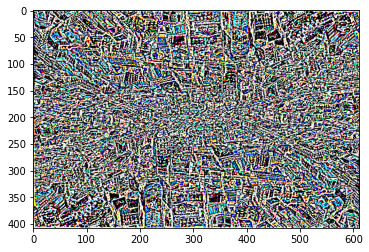

In [ ]:
d = ConvWithFFT(image)

In [ ]:
def gaussianLP2(D0,imgShape):
    rows, cols = image.shape[1:3]
    center = (rows/2,cols/2)
    base = torch.zeros(1,rows,cols)
    for x in range(cols):
        for y in range(rows):
             base[0][y][x] = math.exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

In [ ]:
from torchvision import transforms

In [ ]:
gray_img = torchvision.transforms.functional.rgb_to_grayscale(image)
fft_img = torch.fft.fft(gray_img)
im_fft = torch.fft.fftshift(fft_img)

In [ ]:
from torchvision.transforms import PILToTensor

In [ ]:
tr1 = transforms.ToTensor()
def ConvWithTorchF(image,kernel):
  im1 = Image.Image.split(transforms.ToPILImage()(image))
  channel = torchvision.transforms.functional.get_image_num_channels(image)
  width,height = torchvision.transforms.functional.get_image_size(image)
  KernelWidth,KernelHeight = torchvision.transforms.functional.get_image_size(kernel)
  FınalImg = torch.zeros((channel,height-KernelHeight+1,width-KernelWidth+1))
  
  for i in range(0,channel):
    FınalImg[i] = F.conv2d(tr1(im1[i]), kernel)
  plt.imshow(transforms.ToPILImage()(FınalImg))
  return FınalImg

tensor([[[0.9961, 0.9961, 0.9961,  ..., 0.7725, 0.7804, 0.7804],
         [0.9961, 0.9961, 0.9961,  ..., 0.7725, 0.7804, 0.7804],
         [0.9961, 0.9961, 0.9961,  ..., 0.7765, 0.7804, 0.7804],
         ...,
         [0.0549, 0.1294, 0.1686,  ..., 0.1333, 0.3843, 0.3608],
         [0.1255, 0.1098, 0.1686,  ..., 0.1529, 0.3569, 0.3412],
         [0.1137, 0.0706, 0.0980,  ..., 0.4118, 0.4824, 0.3686]],

        [[1.0000, 1.0000, 1.0000,  ..., 0.8392, 0.8471, 0.8471],
         [1.0000, 1.0000, 1.0000,  ..., 0.8392, 0.8471, 0.8471],
         [1.0000, 1.0000, 1.0000,  ..., 0.8431, 0.8471, 0.8471],
         ...,
         [0.0431, 0.0314, 0.1412,  ..., 0.1569, 0.2471, 0.2745],
         [0.0980, 0.0275, 0.1333,  ..., 0.1373, 0.1765, 0.2353],
         [0.1294, 0.0157, 0.1020,  ..., 0.3176, 0.2863, 0.2118]],

        [[0.9451, 0.9451, 0.9451,  ..., 0.8667, 0.8745, 0.8745],
         [0.9451, 0.9451, 0.9451,  ..., 0.8667, 0.8745, 0.8745],
         [0.9451, 0.9451, 0.9451,  ..., 0.8706, 0.8745, 0.

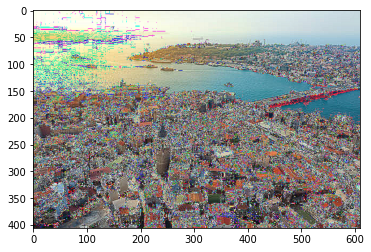

In [ ]:
kernel3 = kernelToWeight(kernel3)
ConvWithTorchF(image,kernel3.float())

In [ ]:
def kernelToWeight(kernel):
  kernel = kernel.view(1,1,3,3).repeat(1,1,1,1)
  return kernel